# Tree classification
- Training is relatively straightforward (although the global optimum is NP-complete/something hard, complex, combinatorial, which has to test all the combinations, $2^{|P|}$, until get the final)

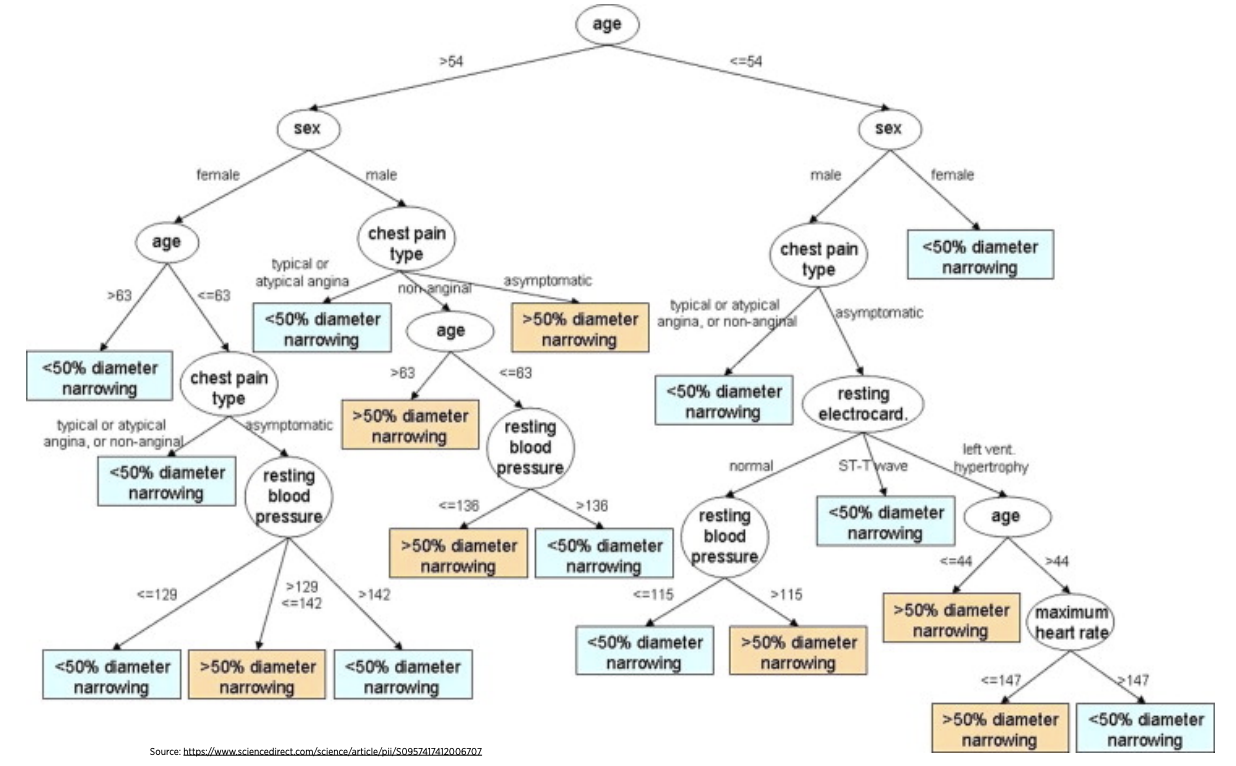
- Internal node (condition) and terminal node (final result).
- Satisfy the internal node, go to the left branch. Otherwise, go to the right branch.

## Regression Tree
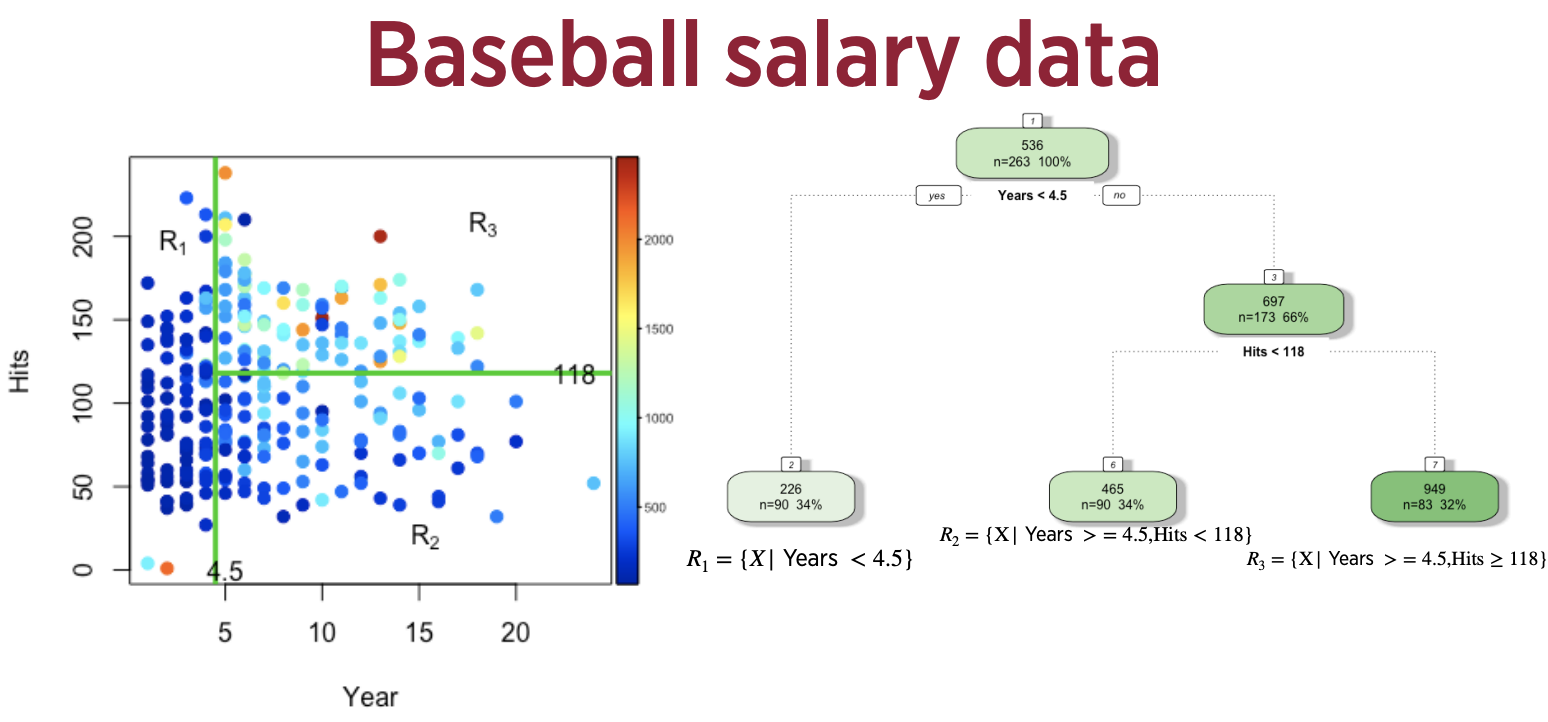
- This one is regression classification
- The final result could be either mean or median or any other formulas of all observations in a particular (distinct and non-overlapping) region.
- For every observation that falls into a particular region, they will have the sam eprediction
- $J = d + 1$, with $J$ is number of regions, $d$ is the spliting time 

### Tree building process
- In theory, the regions could have any shape. But for simplicity and ease of model interpretation purpose, we choose to divide the prdictor space into high-dimensional rectangles, or boxes
- The goal is the find the regions that could **minimise the RSS** (homogeneousness purpose) 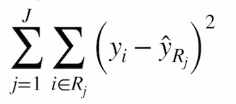 
- where $\hat{y}_{R_j}$ is the mean response for the training observations within the $j$th box

- It is comptationally infeasible to consider every possible partition of the feature space into $J$ boxes
- For this reason, we take a top-down, **greedy** approach that is known as **recursive binary splitting**.
- Begin at the top of the tree and then successively splits the predictor space, following by the RSS minimising; each split is indicated via new two branches further down on the tree.
- Greedy because at each step, the best split is made at that particular step, rather than looking ahead and picking a split that will lead to a better tree in some future step.

## Splitting process
- We first select the predictor $X_j$ and the cut point $s$ such that splitting the predictor space into the regions $\{ X|X_j<s\}$ and $\{ X|s \leq X_j\}$ leads to the **greatest possible reduction in RSS**.
- Next, we repeat the process, looking for the best predictor and best cut point in order to split the data further so as to minimise the RSS within each of the resulting regions.
- However, this time, instead of splitting the entire predictor space, we split one of the two previously identified regions. We now have three regions.
- Again, we look to split one of these three regions further, so as to minimise the RSS. The process continues until a stopping criterion is reached; for instance, we may continue until no region contains more than a given number of observations.

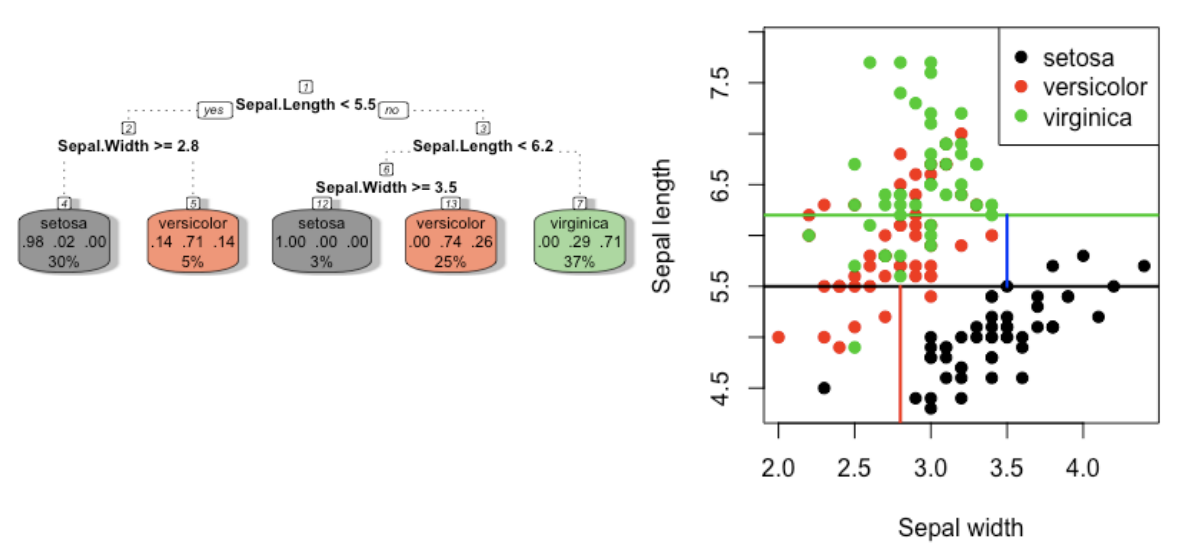

## Prunning tree
What if our tree grows too much? To complicated (Overfitting)
- Too many terminal nodes, and splits
- Terminal nodes include too few observations

Smaller tree with fewer splits might lead to lower variance and better interpretation at the cost of little bias
- To do this, grow a tress only so long as the decrease in the RSS
- Prunning some splits that is seemingly worthless (usually after a very good split), those worthless splits is the reason of the significant reduction in RSS

Step:
- Grow a big tree
- Prune it back in order to gain a subtree
- Using cost complexity prunning (weakest link pruning)
- $$T_\alpha = \Sigma_{m=1}^{|T|} \Sigma_{i:x_i\in R_m} (y_i - \hat{y}_{R_m})^2 + \alpha |T|$$ 
- $\alpha$ is nonnegative tuning parameter (chosen from cross-validation process)
- $T$ is the number of the terminal nodes of orginal tree
- $R_m$ is the rectangle (subset of predictor space) corresponding to $m$th terminal node
- $\hat{y_{R_m}}$ is the mean of the training observations in $R_m$

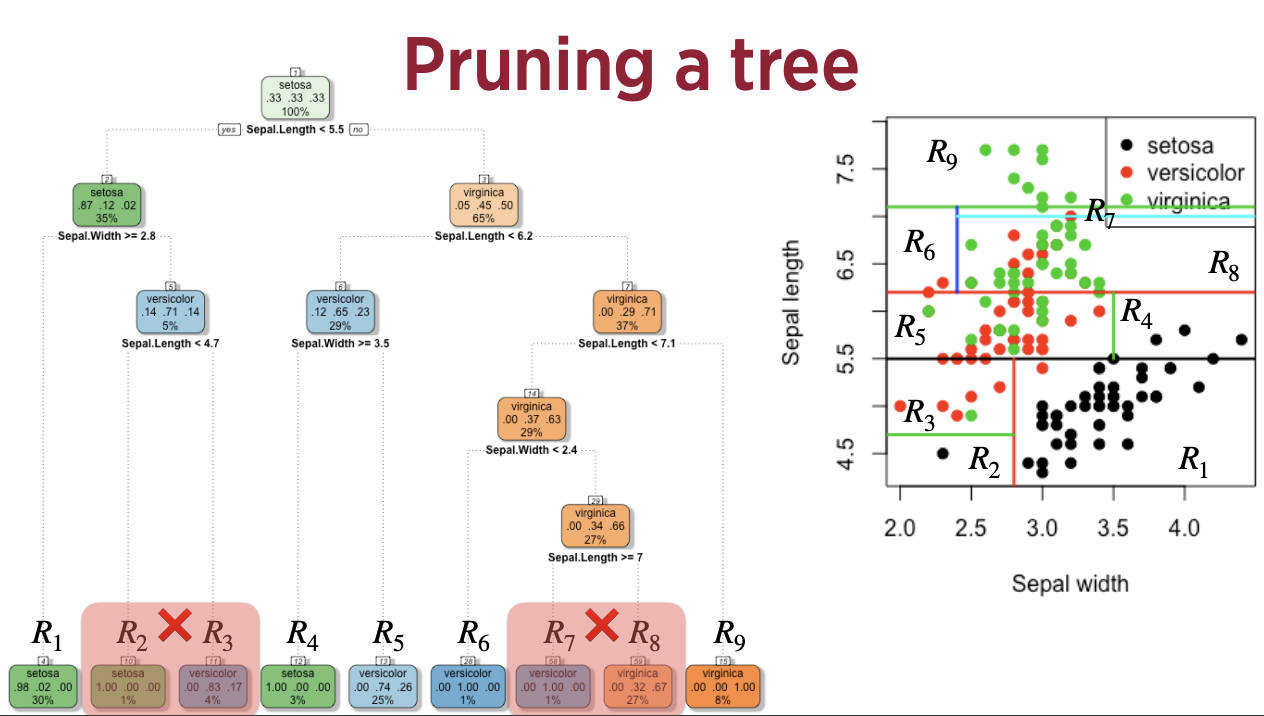
- $R_2$ and $R_7$ contain only 1 observation, so we can sacrifice the RSS a bit to combine its 'sibling' terminal nodes.

## Classification Tree
Just as in the regression setting, we use recursive binary splitting to grow a classification tree with **performance indicator** suitable for classification
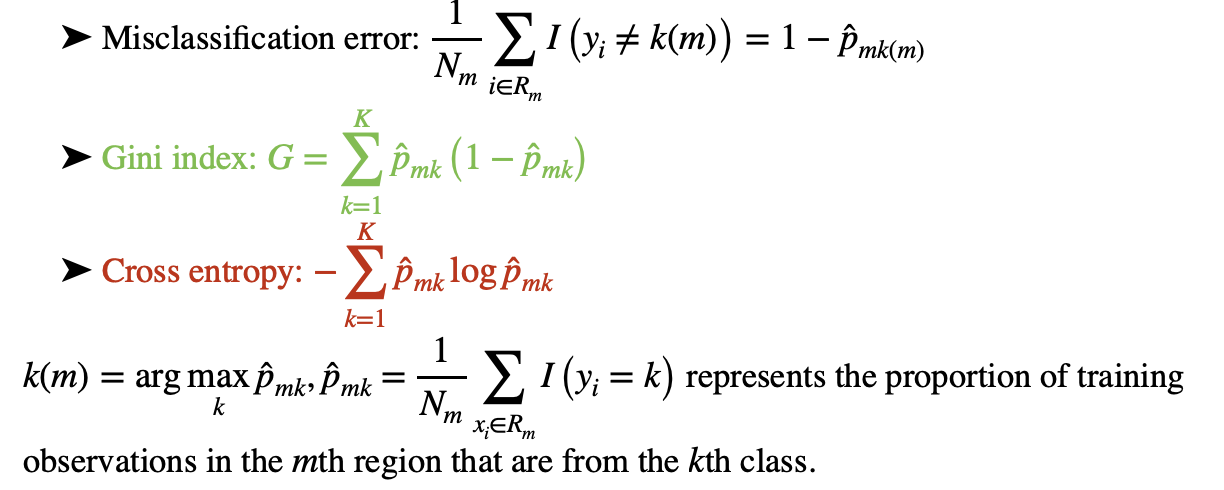

## Summary
- Use recursive binary splitting to grow a large tree on the training dat, stopping only when each terminal node has fewer than some mini number of observation
- Apply cost complexity pruning to large tree in order to obtain a sequence of best subtrees, as a function of $\alpha$
- Use K-fold cross-validation to choose $\alpha$:
    - For each k = 1, ..., $K$
    - Repeat step 1 and 2 on the $\frac{K-1}{K}$th fraction of the training data, excluding the $k$th fold
    - Evaluate the mean squared prediction error on the data in the left-out $k$th fold, as a function of $\alpha$
    - Average the results, and pick $\alpha$ to minimise the average error
- Return the subtree from step 2 that corresponds to the chosen value of $\alpha$

## Issues
## Categorical variable
- Assume $q$ *unordered* categories (levels), there are $2^{q-1}$ possible splits (no empty or itself). When the $q$ large, too expensive to compute
- Example: 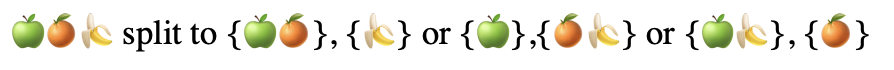
- If $y \in \{ 0,1\}$, this computation simplifies. Order the predictor categories according to the proportion falling in outcome class 1. The split this predictor as if it were an ordered predictor. This works for classification using Gini index and Cross entropy, as well as regression
- For multi-class classification, approximation has to be sought

## Missing value
- General ways of handling missing values
    - Remove them (wasteful?)
    - Imputation: filling with mean/median, or use other observation where the predictor is not missing to infer the missed ones
 
- For categorical predictor: create another category/level called 'missing' if there is any missing value
- More general: surrogate variable (bien dai dien)
    - Split only using observations without missing values
    - Split other variables as well and rank them according to how well they mimic
    - Split by the primary (surrogate) variable, when sending down observation, if primary variable is missing, then try 1st surrogate, then 2nd id neccessary

## Advantages and Disadvantages of Trees
- Trees are very **easy to explain** to people. In fact, they are even easier to explain than linear regression!
- Some people believe that decision trees more **closely mirror human decision-making** than do the regression and classification approaches seen previously.
- Trees can be **displayed graphically**, and are easily **interpreted even by a non-expert** (especially if they are small).
- Trees can easily **handle qualitative predictors without** the need to create **dummy variables**.
- Unfortunately, trees generally **do not have the same level of predictive accuracy** as some of the other regression and classification approaches.
- However, extensions are possible to make them better. 

## Extensions
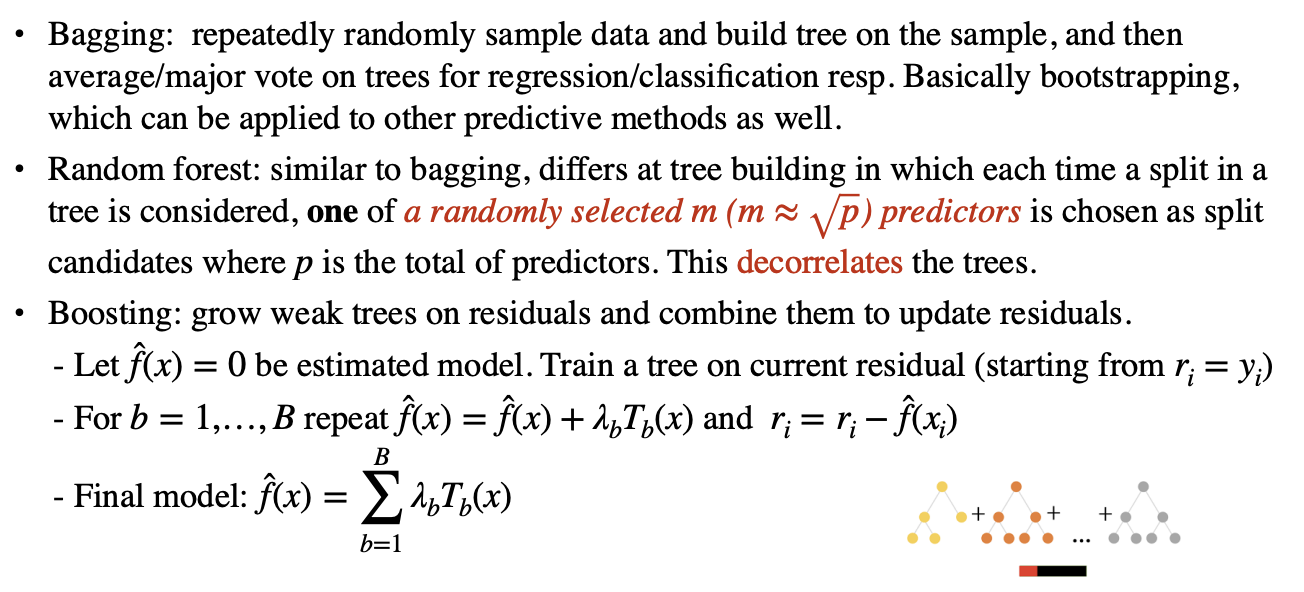

In [31]:
import numpy as np

In [33]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

In [42]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import load_iris
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)